In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import matplotlib.pyplot as plt
import random
import numpy as np

## initialize `G_baseline` network

In [3]:
random.seed(0)
np.random.seed(0)

N = 1000
INIT_EXPOSED = int(N*0.01)

from seirsplus.networks import generate_demographic_contact_network, household_country_data

demographic_graphs, individual_ageGroups, households = generate_demographic_contact_network(
                                                            N=N, demographic_data=household_country_data('US'), 
                                                            distancing_scales=[0.7], isolation_groups=[])

G = demographic_graphs['baseline']
# assign higher weights to inter-household edges
for e in G.edges():
    if "weight" not in G[e[0]][e[1]]:
        G[e[0]][e[1]]["weight"] = 10**10


Generated overall age distribution:
0-9: 0.1140	(-0.0070 from target)
10-19: 0.1310	(0.0000 from target)
20-29: 0.1410	(0.0040 from target)
30-39: 0.1440	(0.0110 from target)
40-49: 0.1170	(-0.0070 from target)
50-59: 0.1290	(-0.0020 from target)
60-69: 0.1020	(-0.0130 from target)
70-79: 0.0720	(0.0020 from target)
80+: 0.0500	(0.0120 from target)

Generated household size distribution:
1: 0.3259	(0.0422 from target)
2: 0.2988	(-0.0463 from target)
3: 0.1160	(-0.0346 from target)
4: 0.1481	(0.0205 from target)
5: 0.0691	(0.0114 from target)
6: 0.0346	(0.0119 from target)
7: 0.0074	(-0.0051 from target)
Num households: 405
mean household size: 2.448393594

Generating graph for 0-9...
Generating graph for 10-19...


/opt/anaconda3/lib/python3.9/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)


Generating graph for 20-59...
Generating graph for 60+...


In [4]:
from seirsplus.viral_model import ViralExtSEIRNetworkModel
from seirsplus.sim_loops_pooled_test import SimulationRunner

## correlated pooling

In [5]:
test_model = ViralExtSEIRNetworkModel(
    G = G,
    beta = 0.5,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    seed = 0,
    initE = INIT_EXPOSED)

sim_correlated = SimulationRunner(
    model=test_model,
    pooling_strategy='correlated',
    T = 50,
    num_groups = 10,
    pool_size = 5,
    seed = 0,
    save_results=False,
)

sim_correlated.run_simulation()

/opt/anaconda3/lib/python3.9/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)


Computing transition probabilities:   0%|          | 0/1000 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00,  9.11it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 58.37it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 150.21it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 151.72it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 136.63it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 88.34it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 117.83it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 103.63it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 138.02it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 153.94it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 133.96it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 153.80it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 170.38it/s]


Computing transition probabilities:   0%|          | 0/98 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 186.34it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 144.12it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 110.49it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 143.68it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 96.79it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 145.35it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 135.40it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 138.96it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 120.20it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 3/3 [00:00<00:00, 41.00it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 187.09it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 115.46it/s]


Computing transition probabilities:   0%|          | 0/94 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 107.71it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 142.13it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 148.53it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 142.60it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 158.95it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 131.01it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 169.12it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 155.34it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 165.07it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 147.17it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]

Generating walks (CPU: 2): 100%|██████████| 3/3 [00:00<00:00, 92.79it/s]


Computing transition probabilities:   0%|          | 0/96 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 151.81it/s]


Computing transition probabilities:   0%|          | 0/98 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 150.61it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 134.82it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 147.84it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 135.77it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 153.47it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 108.95it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 181.29it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 131.45it/s]


Computing transition probabilities:   0%|          | 0/98 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 105.58it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 146.32it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 153.24it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 147.19it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 145.10it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00, 138.90it/s]


In [ ]:
sim_correlated.model.figure_infections(plot_percentages=False)

## Naive pooling

In [ ]:
random.seed(0)
np.random.seed(0)

N = 1000
INIT_EXPOSED = int(N*0.01)

from seirsplus.networks import generate_demographic_contact_network, household_country_data

demographic_graphs, individual_ageGroups, households = generate_demographic_contact_network(
                                                            N=N, demographic_data=household_country_data('US'), 
                                                            distancing_scales=[0.7], isolation_groups=[])

G = demographic_graphs['baseline']
# assign higher weights to inter-household edges
for e in G.edges():
    if "weight" not in G[e[0]][e[1]]:
        G[e[0]][e[1]]["weight"] = 10**10


In [ ]:
test_model = ViralExtSEIRNetworkModel(
    G = G,
    beta = 0.5,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    seed = 0,
    initE = INIT_EXPOSED)

sim_naive = SimulationRunner(
    model = test_model,
    pooling_strategy='naive',
    T = 50,
    num_groups = 10,
    pool_size = 5,
    seed = 0,
    save_results = False
)

sim_naive.run_simulation()

/opt/anaconda3/lib/python3.9/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)


Computing transition probabilities:   0%|          | 0/1000 [00:00<?, ?it/s]

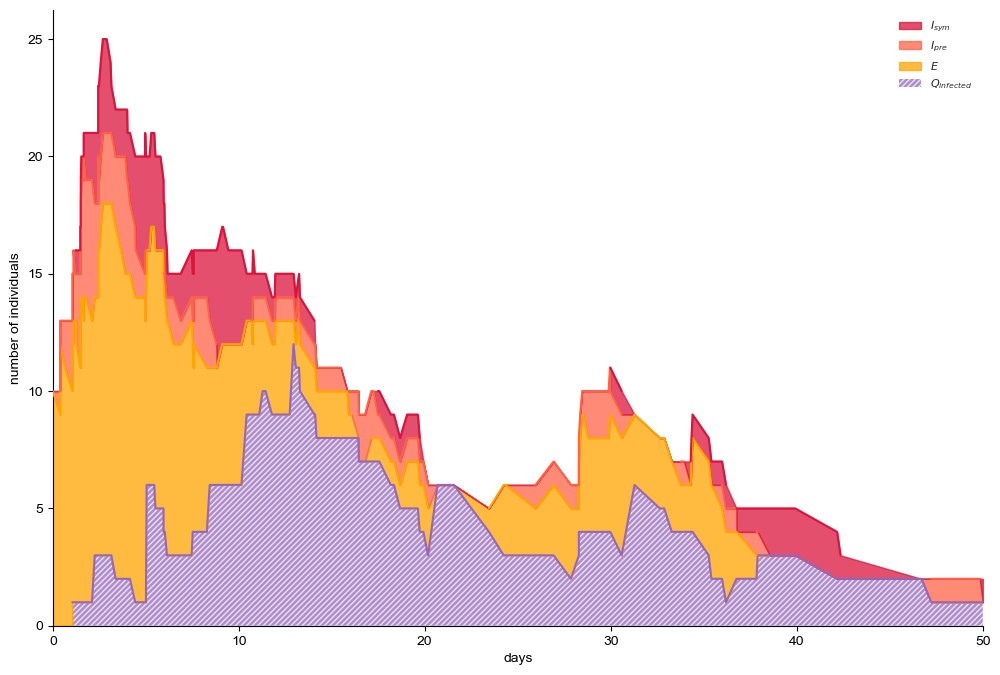

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='days', ylabel='number of individuals'>)

In [ ]:
sim_naive.model.figure_infections(plot_percentages=False)

In [ ]:
metrics = sim_correlated.overall_results[0].keys()
metrics = set(metrics) - {"day"}

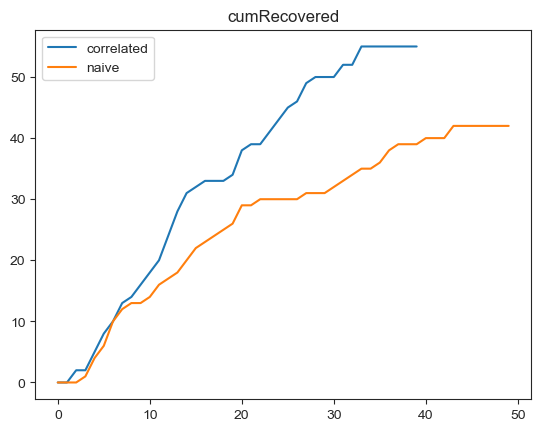

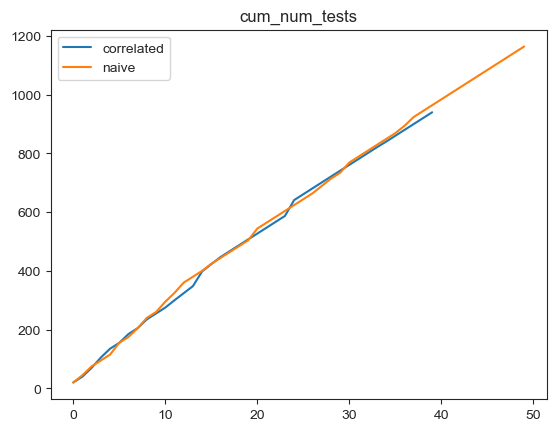

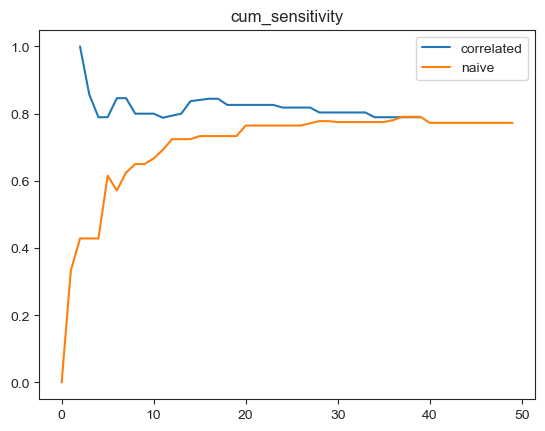

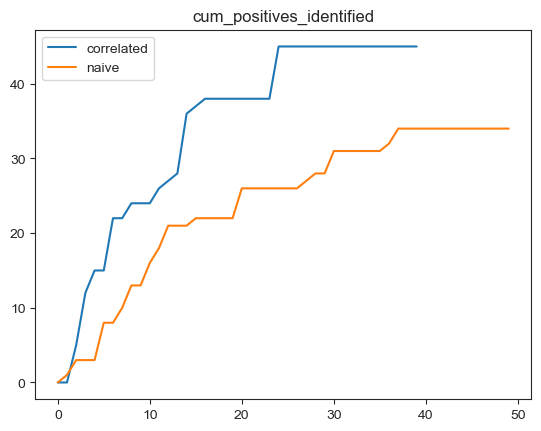

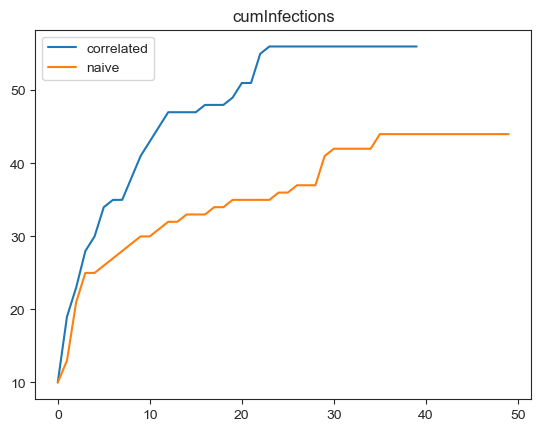

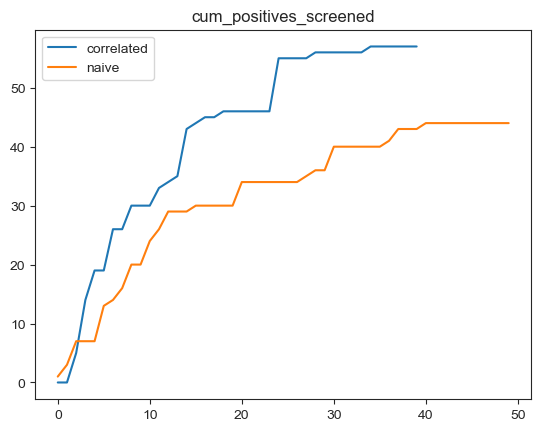

In [ ]:
for metric in metrics:
    plt.plot([result[metric] for result in sim_correlated.overall_results])
    plt.plot([result[metric] for result in sim_naive.overall_results])
    plt.title(metric)
    plt.legend(['correlated', 'naive'])
    plt.show()